In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib.font_manager
matplotlib.font_manager.get_font_names()

['Latin Modern Roman Demi',
 'DejaVu Sans Display',
 'STIXSizeFiveSym',
 'Lato',
 'STIXSizeTwoSym',
 'cmb10',
 'Latin Modern Roman Slanted',
 'Latin Modern Sans',
 'Latin Modern Roman Dunhill',
 'Latin Modern Sans Quotation',
 'Latin Modern Roman Caps',
 'Latin Modern Mono Prop Light',
 'DejaVu Sans Mono',
 'Latin Modern Mono Slanted',
 'Latin Modern Sans Demi Cond',
 'cmmi10',
 'Latin Modern Mono Caps',
 'STIXNonUnicode',
 'cmex10',
 'cmsy10',
 'STIXGeneral',
 'cmr10',
 'cmtt10',
 'DejaVu Serif',
 'Latin Modern Roman',
 'Latin Modern Roman Unslanted',
 'STIXSizeFourSym',
 'Latin Modern Mono Light Cond',
 'DejaVu Sans',
 'Latin Modern Mono Light',
 'Latin Modern Math',
 'cmss10',
 'Latin Modern Mono Prop',
 'STIXSizeOneSym',
 'DejaVu Serif Display',
 'STIXSizeThreeSym',
 'Latin Modern Mono']

In [32]:
font = {'size'   : 45,
        'family' : 'serif'}

matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **font)

In [13]:
#plt.rcParams["font.family"] = "Times_New_Roman"

In [14]:
# training_sizes = np.array([            10,       100,        1000,      10000,    100000])
# mug_cnn_losses = np.array([3675.7544,    # 50 epochs at 10
#                            2196.4033,    # 500 epochs at 100
#                            599.28955,    # 500 epochs at 1000
#                            547.0825,     # 50 epochs at 10000
#                            -1592.5785,]) # 50 epochs at 100000
# mug_cnn_losses_noisy = np.array([3675.107, 4420.676,  8599.875, 8705.852 , 47012.03])
# mug_b3d_losses = np.ones(5) * (-88.39145 * 20), # XXX
# mug_b3d_losses_noisy = np.ones(5) * (-81.27319 * 20) # XXX


# id_cnn_losses =  np.array([2943.1223,  # 2000 epochs at 10
#                            636.64,     # 2000 epochs at 100
#                            312.97165,  # 200 epochs at 1000
#                            220.01677,  # 200 epochs at 10000
#                            219.87979]) # 20 epochs at 100000
# id_cnn_losses_noisy =  np.array([2639.1497, 1375.749, 898.3693, 1844.7981, 1988.4205])
# id_b3d_losses = np.ones(5) * 938.0626 * 20

In [15]:
training_sizes = np.array([            10,       100,        1000,      10000,    100000])
mug_cnn_losses = np.array([3675.7544,    # 20 epochs at 10 lr = 1e-5
                           3675.8,       # 20 epochs at 100 lr = 1e-5, bs = 20
                           1410.0186,    # 20 epochs at 1000 lr = 1e-5, bs = 20
                           -599.1598,    # 20 epochs at 10000 lr = 1e-5, bs = 20
                           -1644.2332,]) # 10 epochs at 100000 lr = 1e-5, bs = 20
mug_cnn_losses_noisy = np.array([3675.705,
                                 3675.8,
                                 3067.8188,
                                 8512.27,
                                 21349.191])
mug_b3d_losses = np.ones(5) * (-88.39145 * 20), # XXX
mug_b3d_losses_noisy = np.ones(5) * (-81.27319 * 20) # XXX


id_cnn_losses =  np.array([2943.1223,  # 2000 epochs at 10
                           636.64,     # 2000 epochs at 100
                           312.97165,  # 200 epochs at 1000
                           220.01677,  # 200 epochs at 10000
                           219.87979]) # 20 epochs at 100000
id_cnn_losses_noisy =  np.array([2639.1497, 1375.749, 898.3693, 1844.7981, 1988.4205])
id_b3d_losses = np.ones(5) * 938.0626 * 20

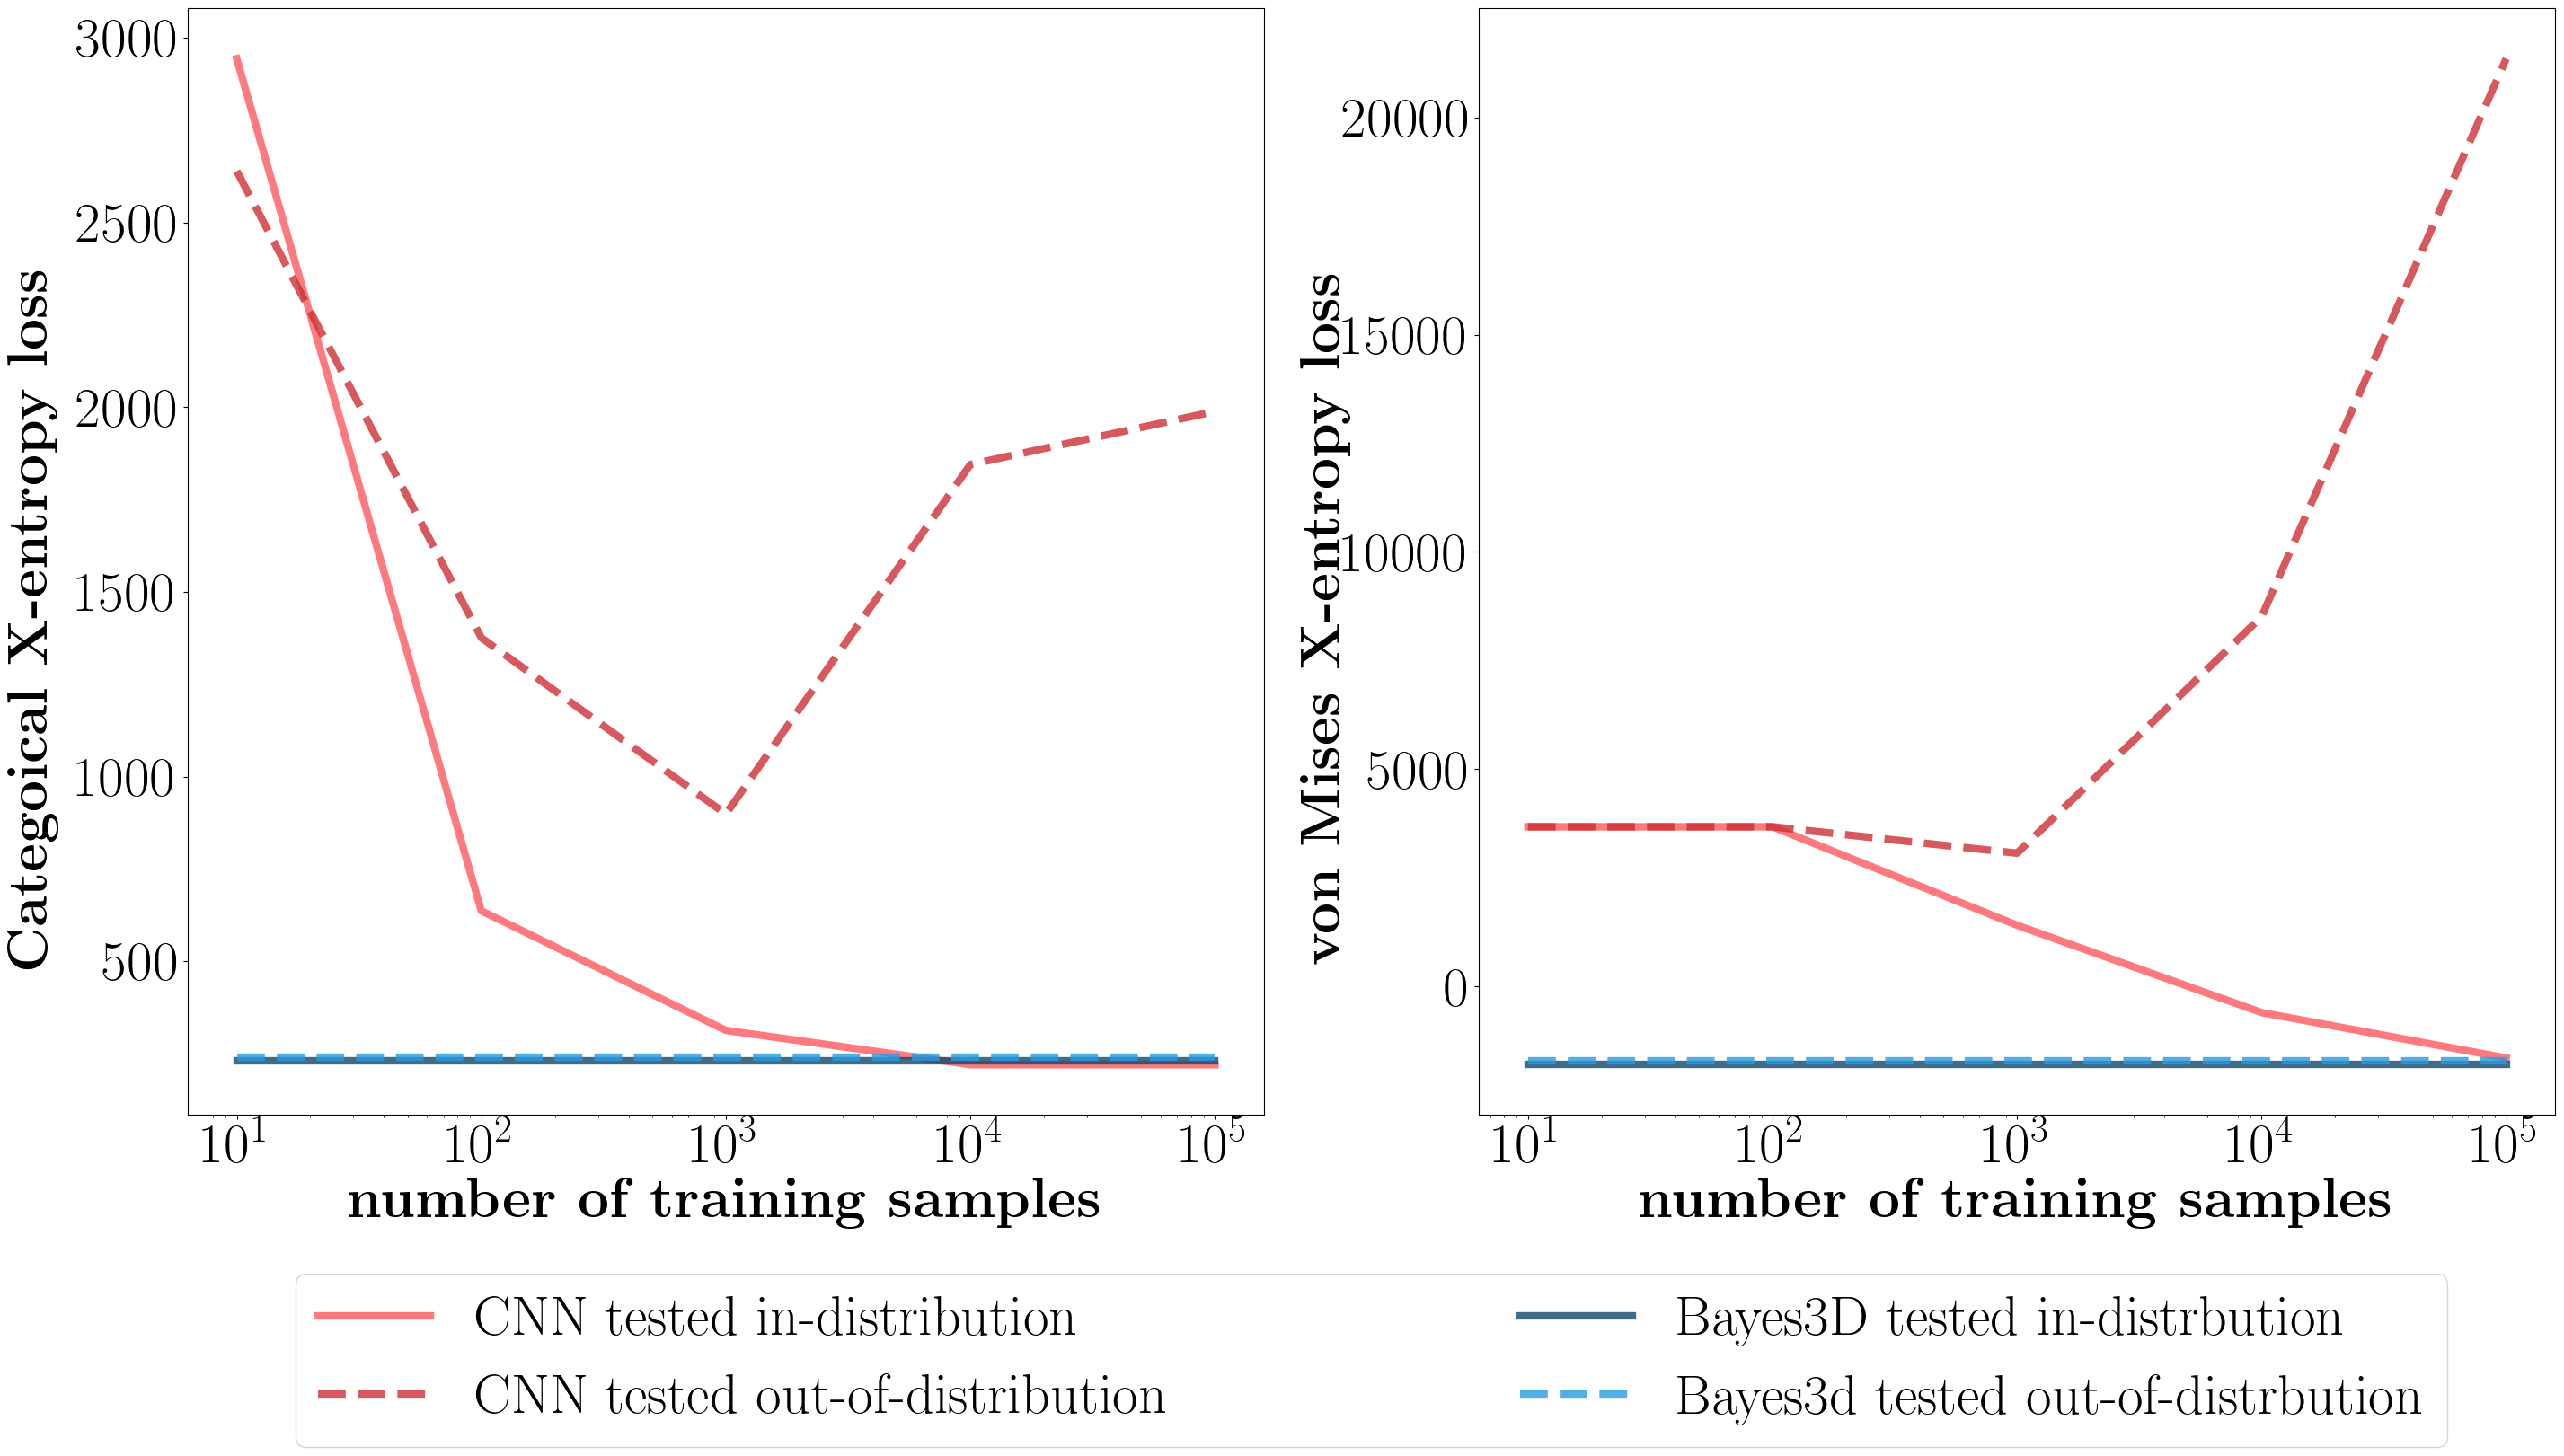

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(34, 16))
#ax.set_title('Bayes3D vs CNN: identity unertainty')
ax = axs[0]
ax.set_xscale('log')
#ax.set_xlabel('# training samples')
ax.yaxis.label.set_fontsize(45)
ax.set_ylabel('\\textbf{Categoical X-entropy loss}')
ax.set_xlabel('\\textbf{number of training samples}')
ax.yaxis.set_label_coords(-0.12, 0.45, transform=None)
#ax.ticklabel_format(style='sci')
#ax.plot(training_sizes, mug_cnn_losses)
#ax.plot(training_sizes, mug_cnn_losses_noisy)
ax.plot(training_sizes, id_cnn_losses, color='#ff595e', label='CNN tested in-distribution', linewidth=6, alpha=0.8)
ax.plot(training_sizes, id_cnn_losses_noisy, color='#CE2F34', linestyle='dashed', label='CNN tested out-of-distribution', linewidth=6, alpha=0.8)

ax.plot(training_sizes, 230 * np.ones(5), color='#124768', label='Bayes3D tested in-distrbution', linewidth=6, alpha=0.8)
ax.plot(training_sizes, 240 * np.ones(5), color='#269BE3', linestyle='dashed', label='Bayes3d tested out-of-distrbution', linewidth=6, alpha=0.8)

ax = axs[1]
ax.set_xscale('log')
ax.yaxis.label.set_fontsize(45)
ax.set_xlabel('\\textbf{number of training samples}')
ax.set_ylabel('\\textbf{von Mises X-entropy loss}')
ax.yaxis.set_label_coords(-0.12, 0.45, transform=None)
#ax.ticklabel_format(styele='sci')

ax.plot(training_sizes, mug_cnn_losses, color='#ff595e', label='CNN tested in-distribution', linewidth=6, alpha=0.8)
ax.plot(training_sizes, mug_cnn_losses_noisy, color='#CE2F34', linestyle='dashed', label='CNN tested out-of-distribution', linewidth=6, alpha=0.8)

ax.plot(training_sizes, -1800 * np.ones(5), color='#124768', label='Bayes3D tested in-distrbution', linewidth=6, alpha=0.8)
ax.plot(training_sizes, -1700 * np.ones(5), color='#269BE3', linestyle='dashed', label='Bayes3d tested out-of-distrbution', linewidth=6, alpha=0.8)

ax.legend(bbox_to_anchor=(-1.1, -0.3, 2.0, .102), loc='lower left',
           ncols=2, mode="expand", borderaxespad=0.)

In [91]:
# fig, axs = plt.subplots(1, 2, figsize=(34, 16))
# #ax.set_title('Bayes3D vs CNN: identity unertainty')
# ax = axs[0]
# ax.set_xscale('log')
# #ax.set_xlabel('# training samples')
# ax.yaxis.label.set_fontsize(45)
# ax.set_ylabel('\\textbf{Categoical X-entropy loss}')
# ax.set_xlabel('\\textbf{number of training samples}')
# ax.yaxis.set_label_coords(-0.12, 0.45, transform=None)
# #ax.ticklabel_format(style='sci')
# #ax.plot(training_sizes, mug_cnn_losses)
# #ax.plot(training_sizes, mug_cnn_losses_noisy)
# ax.plot(training_sizes, id_cnn_losses, color='#ff595e', label='CNN tested in-distribution', linewidth=6, alpha=0.8)
# ax.plot(training_sizes, id_cnn_losses_noisy, color='#CE2F34', linestyle='dashed', label='CNN tested out-of-distribution', linewidth=6, alpha=0.8)

# ax.plot(training_sizes, 230 * np.ones(5), color='#124768', label='Bayes3D tested in-distrbution', linewidth=6, alpha=0.8)
# ax.plot(training_sizes, 240 * np.ones(5), color='#269BE3', linestyle='dashed', label='Bayes3d tested out-of-distrbution', linewidth=6, alpha=0.8)

# ax = axs[1]
# ax.set_xscale('log')
# ax.yaxis.label.set_fontsize(45)
# ax.set_xlabel('\\textbf{number of training samples}')
# ax.set_ylabel('\\textbf{von Mises X-entropy loss}')
# ax.yaxis.set_label_coords(-0.12, 0.45, transform=None)
# #ax.ticklabel_format(styele='sci')

# ax.plot(training_sizes, mug_cnn_losses, color='#ff595e', label='CNN tested in-distribution', linewidth=6, alpha=0.8)
# ax.plot(training_sizes, mug_cnn_losses_noisy, color='#CE2F34', linestyle='dashed', label='CNN tested out-of-distribution', linewidth=6, alpha=0.8)

# ax.plot(training_sizes, -1800 * np.ones(5), color='#124768', label='Bayes3D tested in-distrbution', linewidth=6, alpha=0.8)
# ax.plot(training_sizes, -1700 * np.ones(5), color='#269BE3', linestyle='dashed', label='Bayes3d tested out-of-distrbution', linewidth=6, alpha=0.8)

# ax.legend(bbox_to_anchor=(-1.1, -0.3, 2.0, .102), loc='lower left',
#            ncols=2, mode="expand", borderaxespad=0.)

In [92]:
# fig.savefig('neural-plots.pdf', bbox_inches='tight')
# fig.savefig('neural-plots.png', bbox_inches='tight')

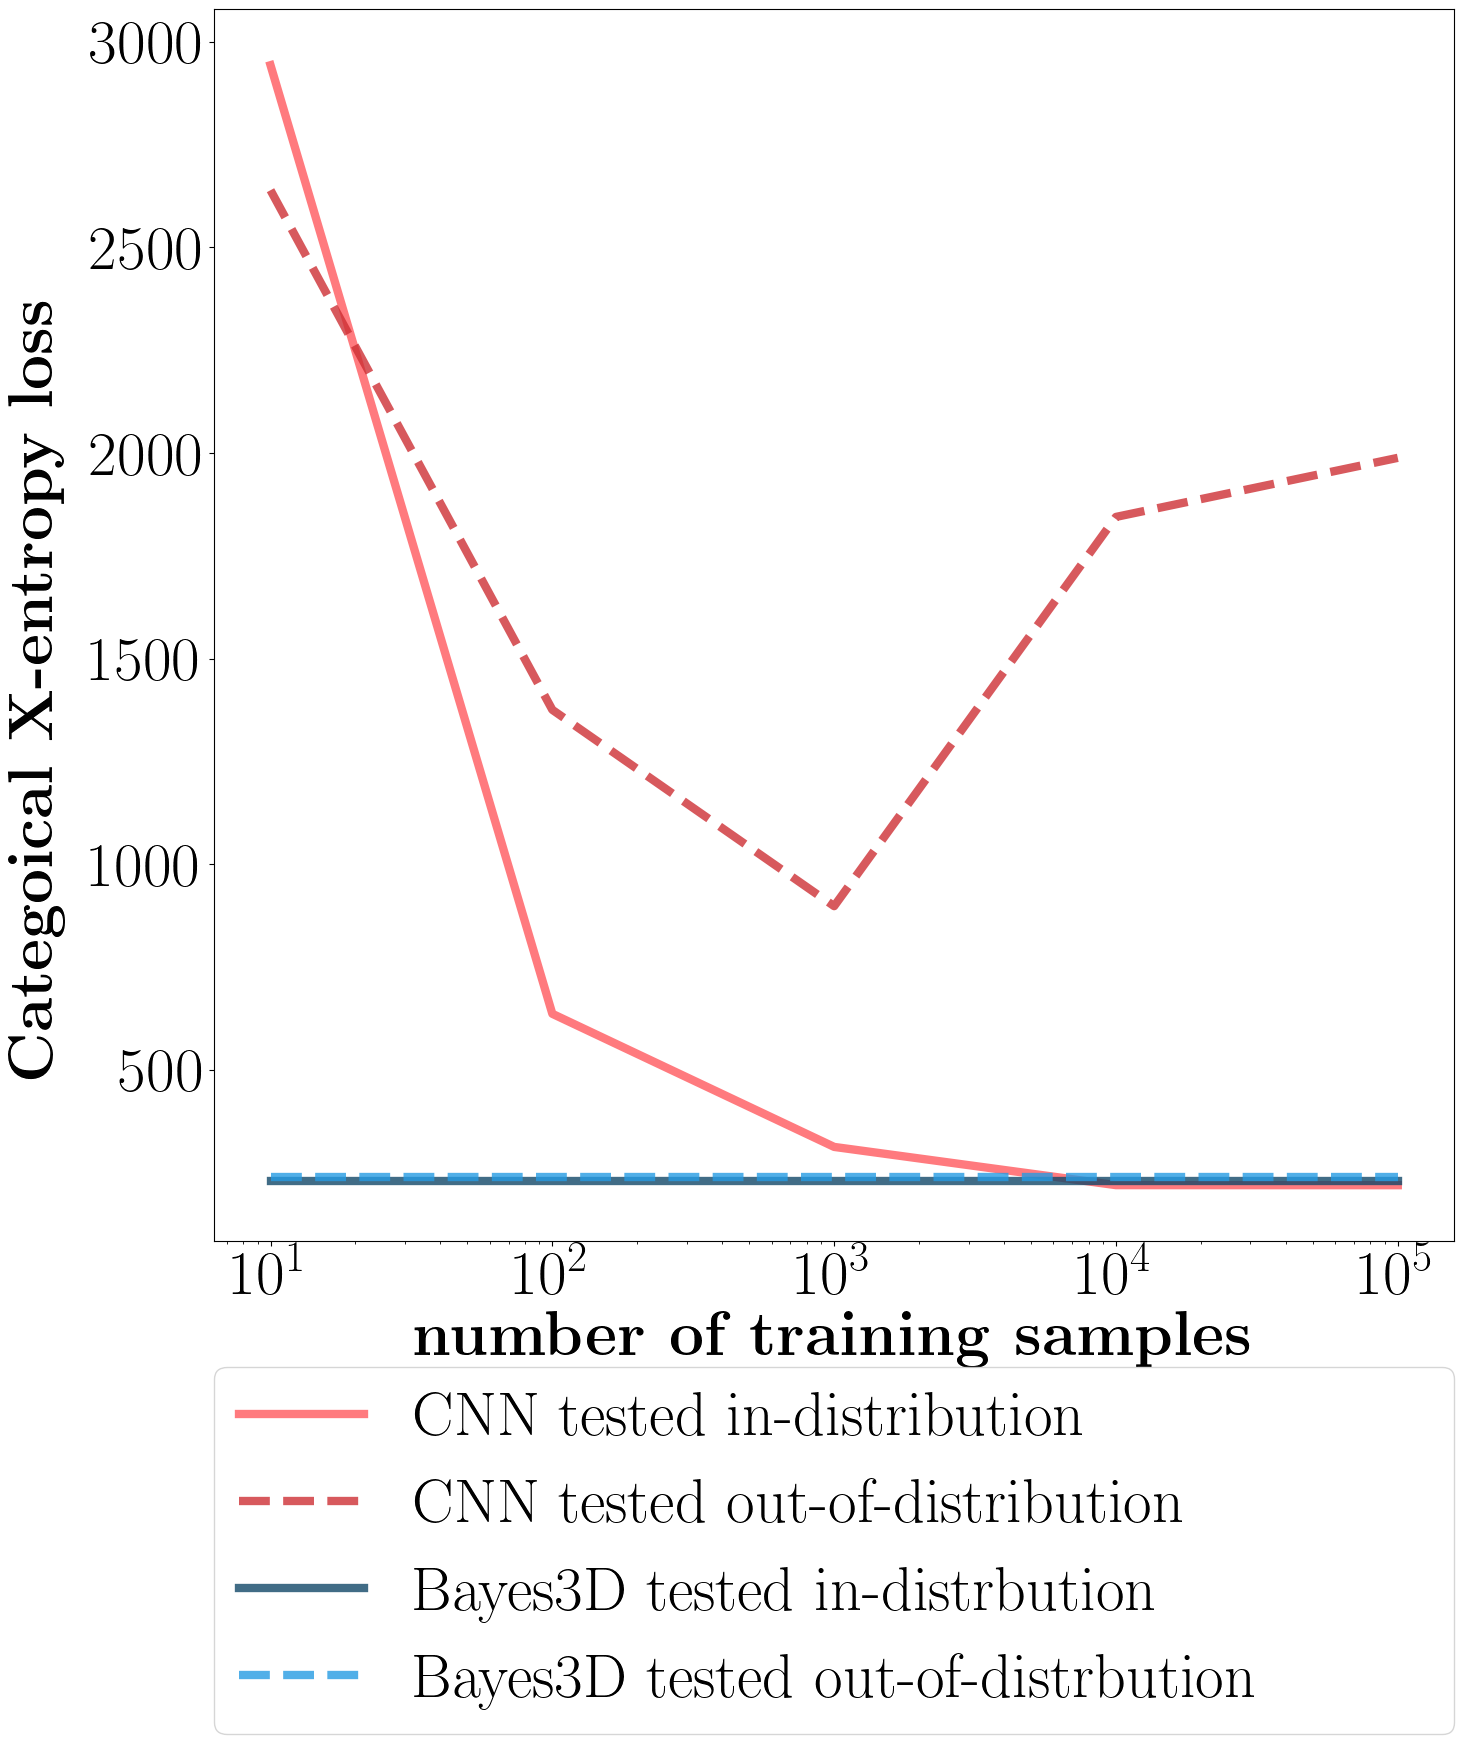

In [112]:
id_cnn_losses =  np.array([2943.1223,  # 2000 epochs at 10
                           636.64,     # 2000 epochs at 100
                           312.97165,  # 200 epochs at 1000
                           220.01677,  # 200 epochs at 10000
                           219.87979]) # 20 epochs at 100000
id_cnn_losses_noisy =  np.array([2639.1497, 1375.749, 898.3693, 1844.7981, 1988.4205])
id_b3d_losses = np.ones(5) * 420

fig, ax = plt.subplots( figsize=(16, 16))
#ax.set_title('Bayes3D vs CNN: identity unertainty')
ax.set_xscale('log')
#ax.set_xlabel('# training samples')
ax.yaxis.label.set_fontsize(45)
ax.set_ylabel('\\textbf{Categoical X-entropy loss}')
ax.set_xlabel('\\textbf{number of training samples}')
ax.yaxis.set_label_coords(-0.12, 0.45, transform=None)
#ax.ticklabel_format(style='sci')
#ax.plot(training_sizes, mug_cnn_losses)
#ax.plot(training_sizes, mug_cnn_losses_noisy)
ax.plot(training_sizes, id_cnn_losses, color='#ff595e', label='CNN tested in-distribution', linewidth=6, alpha=0.8)
ax.plot(training_sizes, id_cnn_losses_noisy, color='#CE2F34', linestyle='dashed', label='CNN tested out-of-distribution', linewidth=6, alpha=0.8)

ax.plot(training_sizes, 230 * np.ones(5), color='#124768', label='Bayes3D tested in-distrbution', linewidth=6, alpha=0.8)
ax.plot(training_sizes, 240 * np.ones(5), color='#269BE3', linestyle='dashed', label='Bayes3D tested out-of-distrbution', linewidth=6, alpha=0.8)


ax.legend(bbox_to_anchor=(-0, -0.4, 1.0, .102), loc='lower left', ncols=1, mode="expand", borderaxespad=0.)

fig.savefig('neural-plots-fork-knife.png', bbox_inches='tight')
fig.savefig('neural-plots-fork-knife.pdf', bbox_inches='tight')

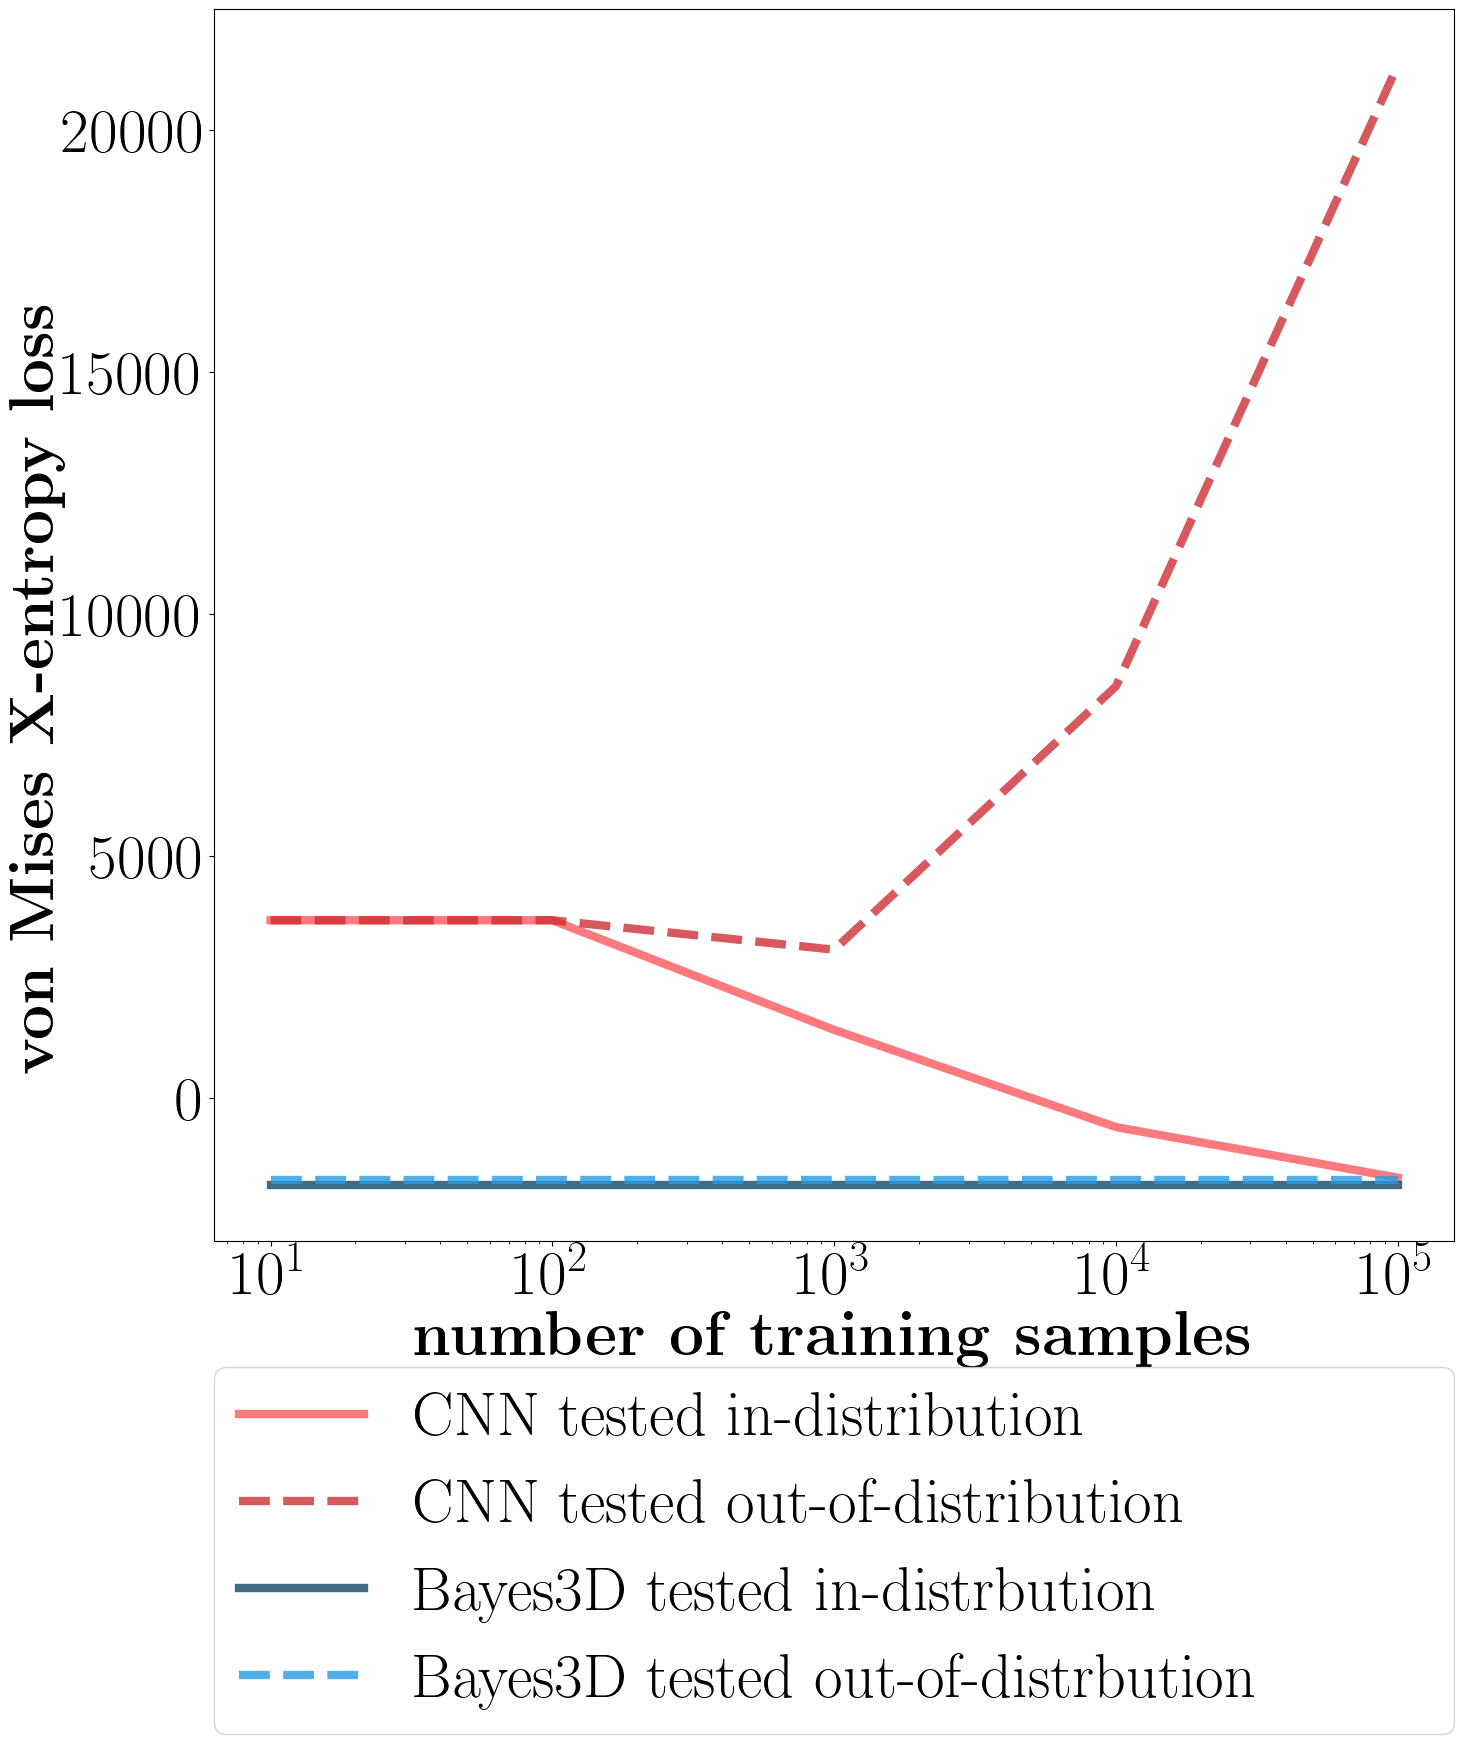

In [111]:
fig, ax = plt.subplots( figsize=(16, 16))
#ax.set_title('Bayes3D vs CNN: identity unertainty')
ax.set_xscale('log')
ax.set_xscale('log')
ax.yaxis.label.set_fontsize(45)
ax.set_xlabel('\\textbf{number of training samples}')
ax.set_ylabel('\\textbf{von Mises X-entropy loss}')
ax.yaxis.set_label_coords(-0.12, 0.45, transform=None)
#ax.ticklabel_format(styele='sci')

ax.plot(training_sizes, mug_cnn_losses, color='#ff595e', label='CNN tested in-distribution', linewidth=6, alpha=0.8)
ax.plot(training_sizes, mug_cnn_losses_noisy, color='#CE2F34', linestyle='dashed', label='CNN tested out-of-distribution', linewidth=6, alpha=0.8)

ax.plot(training_sizes, -1800 * np.ones(5), color='#124768', label='Bayes3D tested in-distrbution', linewidth=6, alpha=0.8)
ax.plot(training_sizes, -1700 * np.ones(5), color='#269BE3', linestyle='dashed', label='Bayes3D tested out-of-distrbution', linewidth=6, alpha=0.8)

ax.legend(bbox_to_anchor=(-0, -0.4, 1.0, .102), loc='lower left', ncols=1, mode="expand", borderaxespad=0.)

fig.savefig('neural-plots-mug.png', bbox_inches='tight')
fig.savefig('neural-plots-mug.pdf', bbox_inches='tight')